In [36]:
import numpy as np
from numpy.linalg import inv, pinv, norm, cond
from matplotlib import pyplot as plt

In [37]:
n = 100
k = 20
lamda_scale = 1/2
scale = 1
kappas = np.logspace(0,8,10)
epsilon = 1e-3
title_str = f'backward_error_n={n}_k={k}_lambda={lamda_scale}_epsilon={epsilon}'
num_experiments = 100

In [38]:
def compute_SMW(n,k,A,B,U,V,lamda,e1,e2,rand_seed=1):
    # np.random.seed(rand_seed)    \
    # add noise
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_inv = inv(A)
    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    error = norm(B-inv(B_inv_approx),ord=2)
    bound = 2*e1*norm(A,ord=2)**2+8*e1*cond(V)**2
    full_bound = 2*e1*norm(A,ord=2)**2 + 4*lamda*e2*(cond(V)*A_inv_B_norm+lamda*e1)**2
    return error,bound,full_bound


In [39]:
errors = np.zeros(len(kappas),dtype=float)        
bounds = np.zeros(len(kappas),dtype=float)          
full_bounds = np.zeros(len(kappas),dtype=float)        


A = np.random.normal(size=(n,n),scale= scale)
U = np.random.normal(size=(n,k))
svals = np.linalg.svd(A,compute_uv=False)
sigma_min, sigma_max = np.min(svals), np.max(svals)
lamda = lamda_scale*sigma_min
U *= np.sqrt(lamda)/norm(U, ord=2)
Q1, _ = np.linalg.qr(np.random.randn(n, k))
Q2, _ = np.linalg.qr(np.random.randn(k, k))

for i,kappa in enumerate(kappas):
    s = np.geomspace(1, 1/kappa, num=k)
    V = Q1 @ np.diag(s) @ Q2.T
    V *= np.sqrt(lamda)/norm(V, ord=2)
    B = A + U@V.T
    A_inv_B_norm = norm(inv(A)@B,ord=2)
    # print('A_inv_B_norm = %f'%A_inv_B_norm)
    print(8*cond(V)**2*epsilon)
    e_i = np.zeros(num_experiments); b_i = np.zeros(num_experiments); f_i = np.zeros(num_experiments)
    for t in range(num_experiments):
        e_i[t],b_i[t],f_i[t] = compute_SMW(n,k,A,B,U,V,lamda,epsilon,epsilon)
    errors[i] = np.mean(e_i)
    bounds[i] = np.mean(b_i)
    full_bounds[i] = np.mean(f_i)

0.008000000000000007
0.4795874002551519
28.750509310436982
1723.5477520255022
103323.97320118273
6194109.461448524
371327106.6876785
22260475217.90192
1334480429985.0488
80000000014702.16


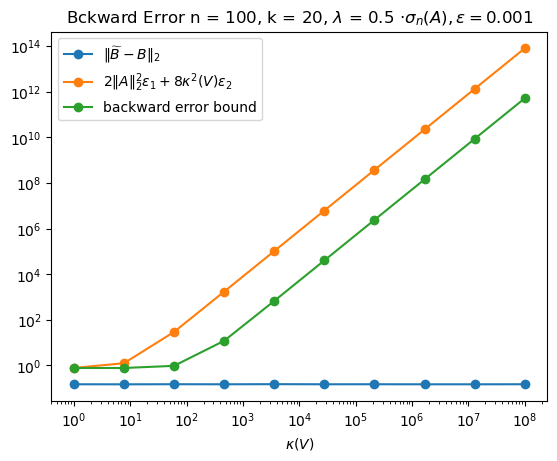

In [40]:
plt.loglog(kappas,errors,label=r'$\|\widetilde{B}-B\|_2$',marker='o')
plt.loglog(kappas,bounds,label=r'$2\|A\|_2^2 \epsilon_1 + 8 \kappa^2(V) \epsilon_2$',marker='o')
plt.loglog(kappas,full_bounds,label='backward error bound',marker='o')
# plt.axvline(x=1/2/lamda/cond(V)/B_inv_A_norm,ls=':',color='red',label=r'$\frac{1}{2\lambda \kappa(V)\|B^{-1}A \|_2}$')
plt.legend()
plt.xlabel(r'$\kappa(V)$')
plt.title(f'Bckward Error n = {n}, k = {k}, '+r'$\lambda$'+f' = {lamda_scale} '+r'$\cdot\sigma_{n}(A), \epsilon = $'+f'{epsilon}')
plt.savefig('final_experiments/'+title_str+'_kappa_small_update.png')

In [41]:
2*epsilon*norm(A,ord=2)**2

0.7739647594895703

In [42]:
errors

array([0.14989189, 0.14926224, 0.15071353, 0.14971975, 0.15161187,
       0.14993039, 0.15027687, 0.1495628 , 0.14948226, 0.15037972])